In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_blobs = pd.read_csv('D:\\COURSES\\Python for Machine Learning & Data Science Masterclass\\24 - DBSCAN Densitybased spatial clustering of applications with noise\\211 - cluster-blobs.csv')

In [3]:
df_blobs

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479
...,...,...
1495,0.882673,-6.786272
1496,0.946854,-7.254512
1497,3.180138,6.608660
1498,5.454552,6.461246


<Axes: xlabel='X1', ylabel='X2'>

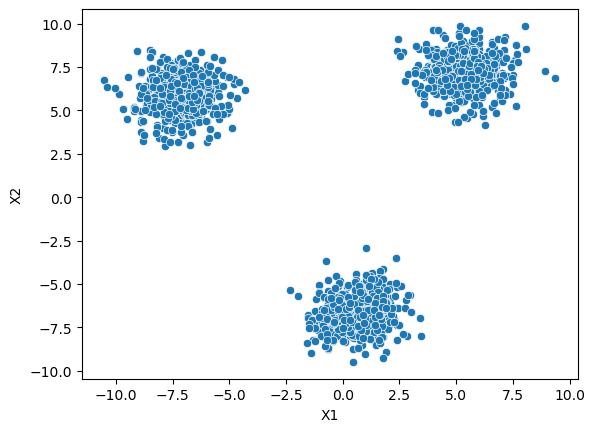

In [4]:
sns.scatterplot(df_blobs,x="X1",y="X2")

In [5]:
df_moons = pd.read_csv('D:\\COURSES\\Python for Machine Learning & Data Science Masterclass\\24 - DBSCAN Densitybased spatial clustering of applications with noise\\211 - cluster-moons.csv')

In [6]:
df_moons

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164
...,...,...
1495,1.957344,0.187184
1496,0.962394,0.384304
1497,-0.761893,0.581666
1498,1.803858,-0.154705


<Axes: xlabel='X1', ylabel='X2'>

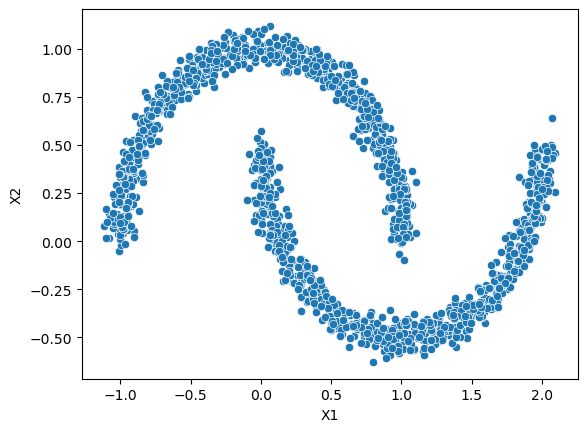

In [7]:
sns.scatterplot(df_moons,x="X1",y="X2")

In [8]:
df_circles = pd.read_csv('D:\\COURSES\\Python for Machine Learning & Data Science Masterclass\\24 - DBSCAN Densitybased spatial clustering of applications with noise\\211 - cluster-circles.csv')

In [9]:
df_circles

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354
...,...,...
1495,-0.297506,0.077834
1496,0.082555,-0.270371
1497,0.279533,-0.109435
1498,0.027432,-0.264891


<Axes: xlabel='X1', ylabel='X2'>

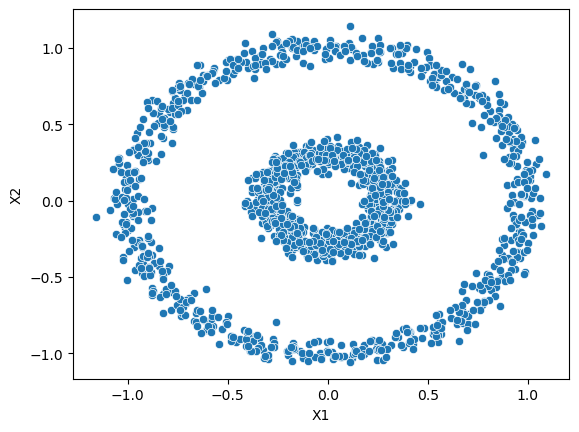

In [10]:
sns.scatterplot(df_circles,x="X1",y="X2")

In [11]:
from sklearn.cluster import KMeans,DBSCAN

In [12]:
def utilizeModel(model,data):
    preds=model.fit_predict(data)
    sns.scatterplot(data,hue=preds,x="X1",y="X2")

In [13]:
k_model=KMeans(n_clusters=3)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


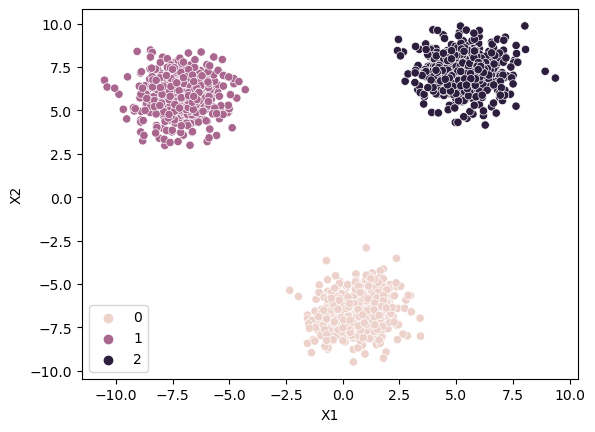

In [14]:
utilizeModel(k_model,df_blobs)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


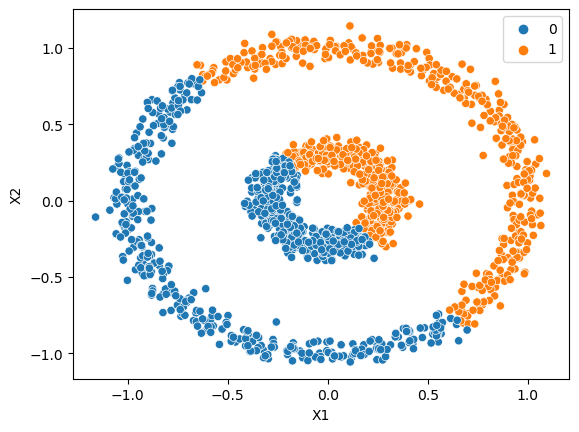

In [15]:
utilizeModel(KMeans(n_clusters=2),df_circles)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


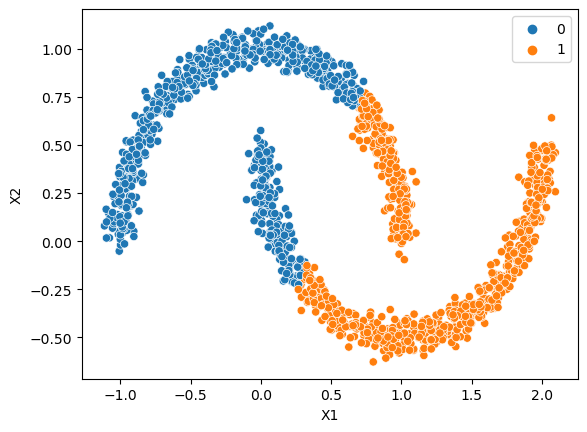

In [16]:
utilizeModel(KMeans(n_clusters=2),df_moons)

In [17]:
DB_MODEL=DBSCAN()

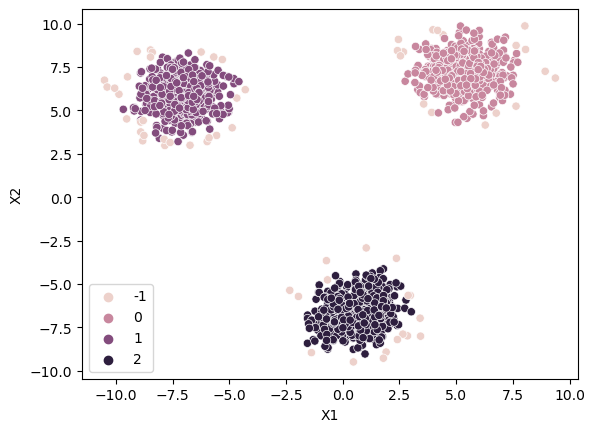

In [18]:
utilizeModel(DB_MODEL,df_blobs)

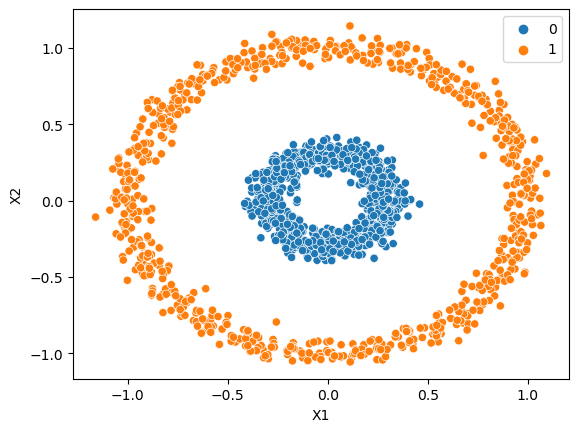

In [19]:
utilizeModel(DBSCAN(eps=0.15),df_circles)

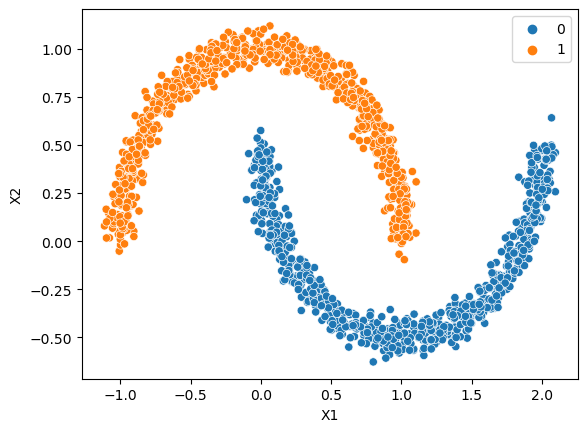

In [20]:
utilizeModel(DBSCAN(eps=0.15),df_moons)

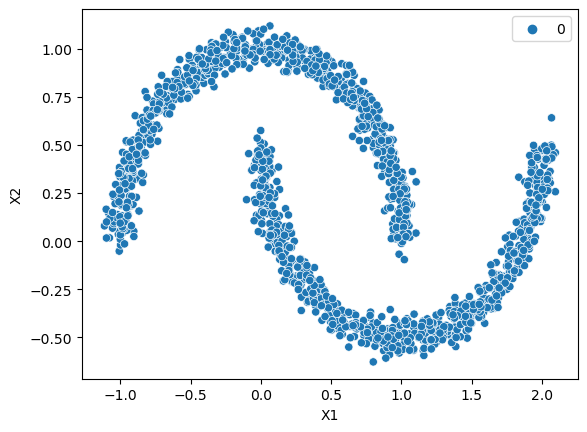

In [21]:
utilizeModel(DBSCAN(),df_moons)

In [25]:
df_blobs_outliers=pd.read_csv('D:\\COURSES\\Python for Machine Learning & Data Science Masterclass\\24 - DBSCAN Densitybased spatial clustering of applications with noise\\211 - cluster-two-blobs-outliers.csv')

In [26]:
df_blobs_outliers

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
998,0.954444,0.889178
999,-8.867767,-5.635758
1000,-4.000000,-2.000000
1001,0.000000,-8.000000


<Axes: xlabel='X1', ylabel='X2'>

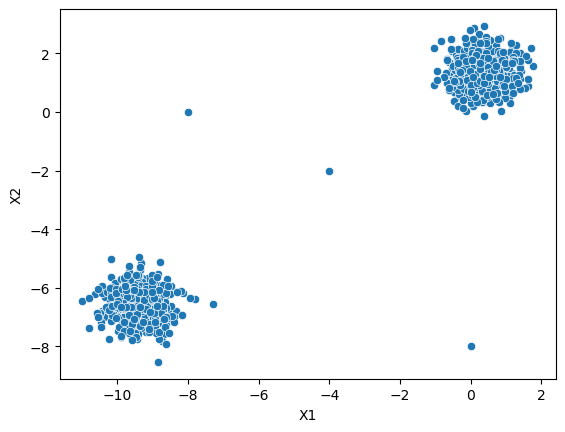

In [27]:
sns.scatterplot(df_blobs_outliers,x="X1",y="X2")

In [32]:
def ImplementModel(model,data):
    labels=model.fit_predict(data)
    sns.scatterplot(data=data,x="X1",y="X2",hue=labels,palette="viridis")

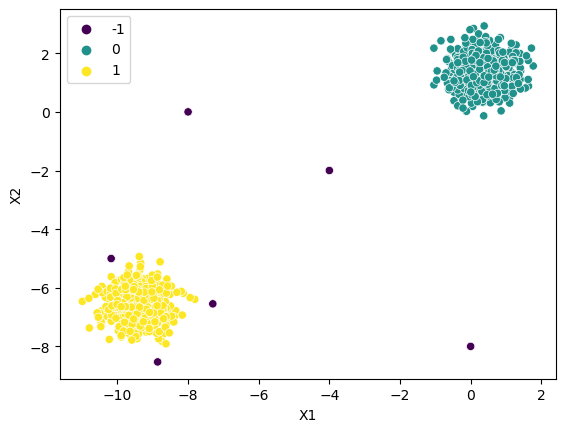

In [33]:
ImplementModel(DBSCAN(),df_blobs_outliers)

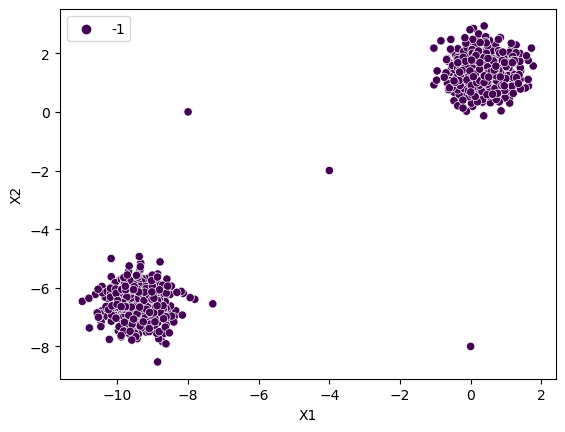

In [34]:
ImplementModel(DBSCAN(eps=0.001),df_blobs_outliers)

In [39]:
dbs=DBSCAN(eps=1)

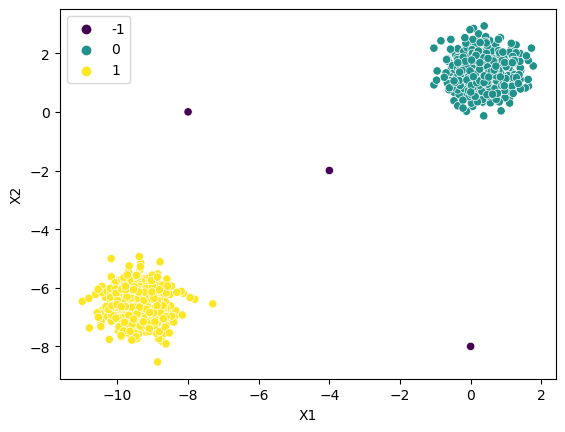

In [40]:
ImplementModel(dbs,df_blobs_outliers)

In [42]:
len(dbs.labels_)

1003

In [46]:
np.sum(dbs.labels_==-1) #outliers

3

In [50]:
(np.sum(dbs.labels_==-1)*100)/len(dbs.labels_)  #outliers %

0.29910269192422734

In [51]:
outliers_percent=[]
num_of_outliers=[]

In [54]:
for i in np.linspace(0.001,10,100):
    dbs=DBSCAN(eps=i)
    dbs.fit(df_blobs_outliers)
    num_of_outliers.append(np.sum(dbs.labels_==-1))
    per=(np.sum(dbs.labels_==-1)*100)/len(dbs.labels_)
    outliers_percent.append(per)

<Axes: >

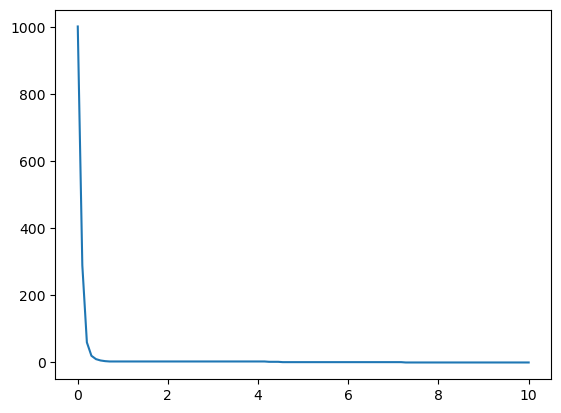

In [55]:
sns.lineplot(x=np.linspace(0.001,10,100),y=num_of_outliers)

<Axes: >

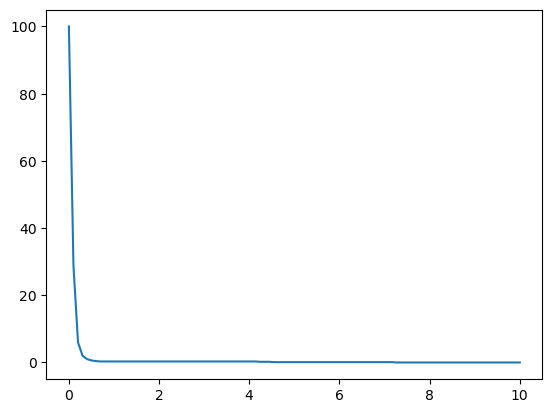

In [56]:
sns.lineplot(x=np.linspace(0.001,10,100),y=outliers_percent)

(0.0, 2.0)

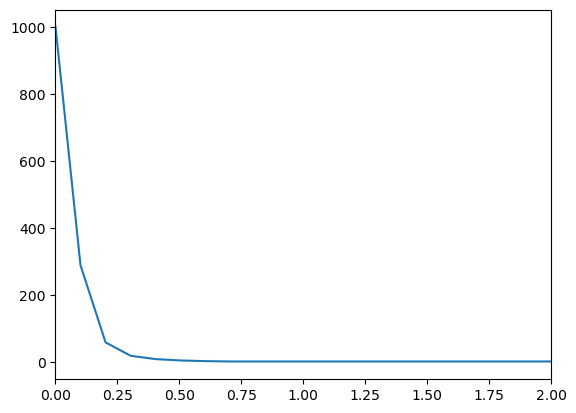

In [57]:
sns.lineplot(x=np.linspace(0.001,10,100),y=num_of_outliers)
plt.xlim(0,2)

In [64]:
outliers_percent=[]
num_of_outliers=[]
for i in np.linspace(0.001,7,200):
    dbs=DBSCAN(eps=i)
    dbs.fit(df_blobs_outliers)
    num_of_outliers.append(np.sum(dbs.labels_==-1))
    per=(np.sum(dbs.labels_==-1)*100)/len(dbs.labels_)
    outliers_percent.append(per)

(0.0, 10.0)

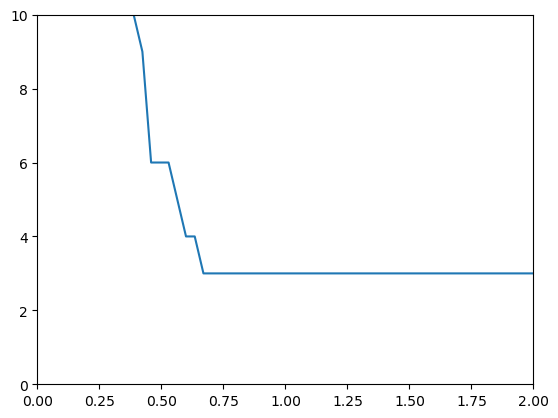

In [68]:
sns.lineplot(x=np.linspace(0.001,7,200),y=num_of_outliers)
plt.xlim(0,2)
plt.ylim(0,10)

In [70]:
outliers_percent=[]
num_of_outliers=[]
for i in np.arange(1,100):
    dbs=DBSCAN(min_samples=i)
    dbs.fit(df_blobs_outliers)
    num_of_outliers.append(np.sum(dbs.labels_==-1))
    per=(np.sum(dbs.labels_==-1)*100)/len(dbs.labels_)
    outliers_percent.append(per)

<Axes: >

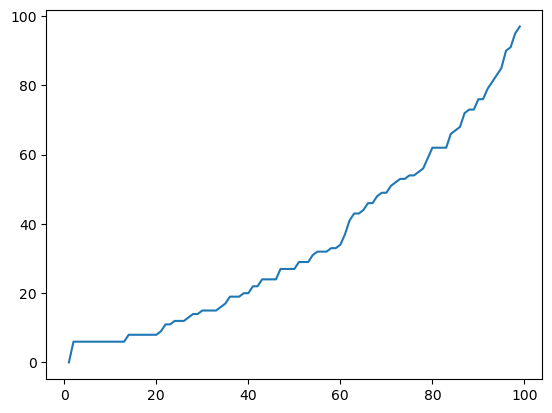

In [74]:
sns.lineplot(x=np.arange(1,100),y=num_of_outliers)


In [77]:
dbs=DBSCAN(min_samples=1)

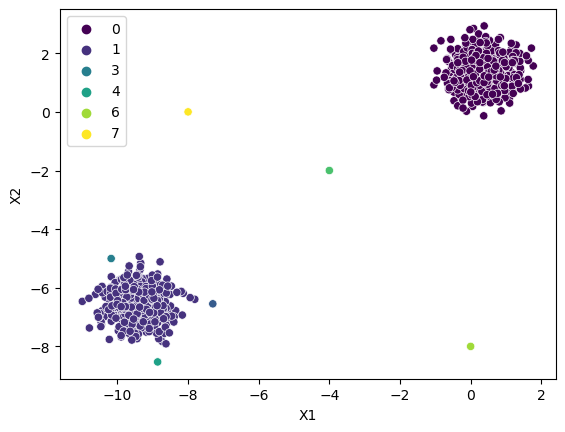

In [78]:
ImplementModel(dbs,df_blobs_outliers)

In [79]:
dbs=DBSCAN(min_samples=5)

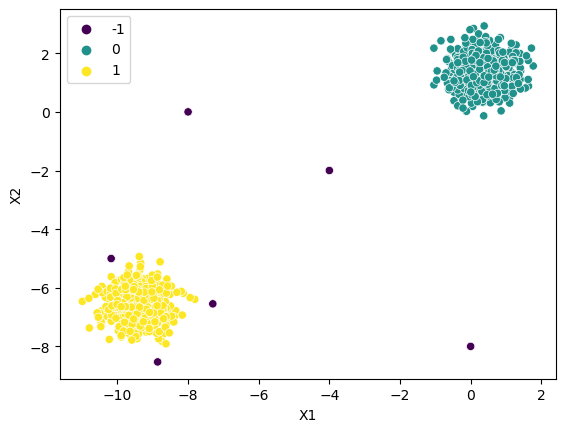

In [80]:
ImplementModel(dbs,df_blobs_outliers)

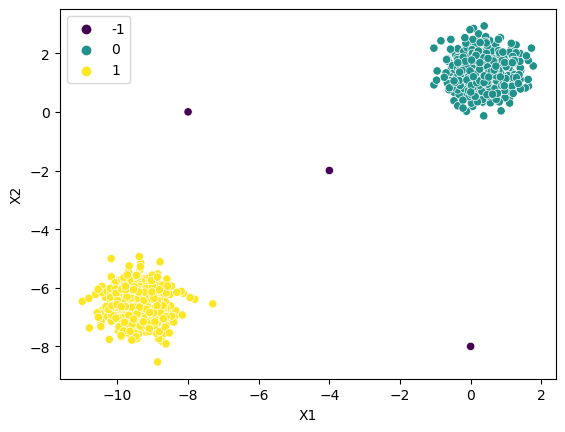

In [88]:
dbs=DBSCAN(min_samples=5,eps=0.75)
ImplementModel(dbs,df_blobs_outliers)

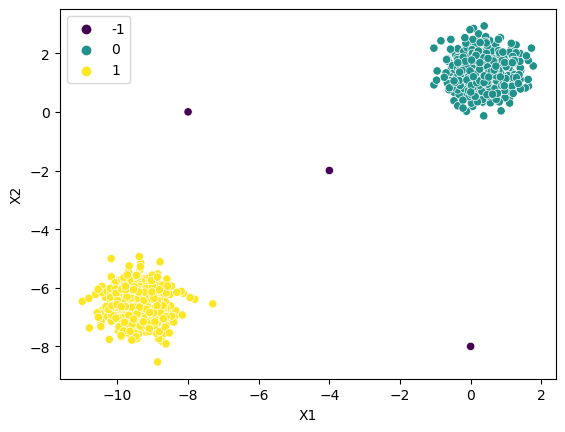

In [89]:
num_dim=df_blobs_outliers.shape[1] #good to start with this
dbs=DBSCAN(min_samples=2*num_dim,eps=0.75)
ImplementModel(dbs,df_blobs_outliers)